To get coloured headings use `<font color=blue|red|green|pink|yellow>text</font>`

In [41]:
import numpy as np
import os
import pandas as pd

In [42]:
car_data = pd.read_csv("toyota.csv",index_col=0)

### get_dtype_counts is removed in 2021. this function returns count of each data type

In [43]:
car_data.dtypes.value_counts()

int64      4
object     4
float64    2
dtype: int64

### select data based on data types. Can have multiple filters inside square braces

In [44]:
car_data.select_dtypes(include=None,exclude=[object])

,Price,Age,MetColor,Automatic,CC,Weight
0,13500,23.0,1.0,0,2000,1165
1,13750,23.0,1.0,0,2000,1165
2,13950,24.0,NaN,0,2000,1165
3,14950,26.0,0.0,0,2000,1165
4,13750,30.0,0.0,0,2000,1170
...,...,...,...,...,...,...
1431,7500,NaN,1.0,0,1300,1025
1432,10845,72.0,0.0,0,1300,1015
1433,8500,NaN,0.0,0,1300,1015
1434,7250,70.0,1.0,0,1300,1015


### info() giving details summary of dataframe

In [45]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 123.4+ KB


### unique() elements of column

In [46]:
print(np.unique(car_data["HP"]))

['107' '110' '116' '192' '69' '71' '72' '73' '86' '90' '97' '98' '????']


### Check each column how automatic data values became different data type. Like print(np.unique(car_data["HP"]))

### We have a double and ???? question mark. That is reson it is read as object instead of int64

In [47]:
car_data = pd.read_csv("toyota.csv",index_col=0,na_values=["??","????"]) #All ?? and ???? will be replaced with nan

In [48]:
print(np.unique(car_data["HP"]))

[ 69.  71.  72.  73.  86.  90.  97.  98. 107. 110. 116. 192.  nan  nan
  nan  nan  nan  nan]


In [49]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


### Converting data type using astype()

In [50]:
car_data['MetColor'] = car_data['MetColor'].astype('object')
car_data['Automatic'] = car_data['Automatic'].astype('object')

In [51]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 123.4+ KB


### Changing to category data type the size reduces

In [52]:
car_data['FuelType'].nbytes

11488

In [53]:
car_data['FuelType'].astype('category').nbytes

1460

### replace word five with number 5

In [54]:
print(np.unique(car_data['Doors']))

['2' '3' '4' '5' 'five' 'four' 'three']


In [55]:
car_data['Doors'].replace('three',3,inplace=True)

In [56]:
car_data['Doors'].replace('five',5,inplace=True)

In [57]:
car_data['Doors'].replace('four',4,inplace=True)

In [58]:
car_data['Doors'] = car_data['Doors'].astype('int64')

In [59]:
car_data['Doors'].nbytes

11488

## Get count of missing values in each column

In [60]:
car_data.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

## Remove the nan rows completely. axis=0 removes the row with nan value. inplace=True makes changes in same dataframe

In [61]:
car_data.dropna(axis=0,inplace=True)

# Frequency Table, Correlations

In [62]:
pd.crosstab(index=car_data['FuelType'],columns='count',dropna=True) #dropna=True drop records with nan value

col_0,count
FuelType,
CNG,12
Diesel,116
Petrol,968


### Relation between two categorical variables. dropna removes the row having nan in any column

In [63]:
pd.crosstab(index=car_data['Automatic'],columns=car_data['FuelType'],dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,12,116,910
1,0,0,58


## Even data_table can be used to read csv files

In [64]:
datanew = pd.read_table("toyota.csv",sep=",")

In [65]:
datanew

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


## Joint Probability using normalize=True

In [66]:
pd.crosstab(index=car_data['Automatic'],columns=car_data['FuelType'],normalize=True, dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.010949,0.105839,0.830292
1,0.000000,0.000000,0.052920


## Margin probability using margins=True. Gives Total Sum

In [67]:
pd.crosstab(index=car_data['Automatic'],columns=car_data['FuelType'],normalize=True, dropna=True, margins=True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.010949,0.105839,0.830292,0.94708
1,0.000000,0.000000,0.052920,0.05292
All,0.010949,0.105839,0.883212,1.00000


## Conditional Probability

In [68]:
pd.crosstab(index=car_data['Automatic'],columns=car_data['FuelType'],normalize='columns', dropna=True, margins=True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,1.0,1.0,0.940083,0.94708
1,0.0,0.0,0.059917,0.05292


## Correlations between variables

In [69]:
numerical_data = car_data.select_dtypes(exclude=[object])

In [70]:
corr_matrix = numerical_data.corr()

In [71]:
corr_matrix

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.000000,-0.877706,-0.601944,0.334261,0.099880,0.201034,0.532614
Age,-0.877706,1.000000,0.525695,-0.162063,-0.084851,-0.170178,-0.442295
KM,-0.601944,0.525695,1.000000,-0.368629,0.319733,-0.082495,-0.029703
HP,0.334261,-0.162063,-0.368629,1.000000,0.037291,0.059517,0.084527
CC,0.099880,-0.084851,0.319733,0.037291,1.000000,0.117831,0.623643
Doors,0.201034,-0.170178,-0.082495,0.059517,0.117831,1.000000,0.304455
Weight,0.532614,-0.442295,-0.029703,0.084527,0.623643,0.304455,1.000000


# Matplotlib

## Scatter Plot

In [85]:
car_data.dropna(axis=0,inplace=True) # axis=0 will remove all rows with nan values

In [86]:
import matplotlib.pyplot as plt

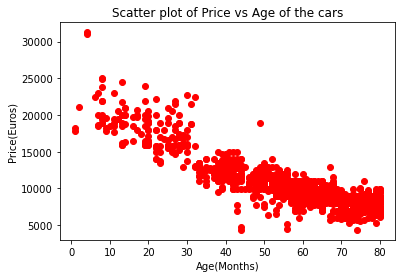

In [87]:
plt.scatter(car_data['Age'],car_data['Price'],c='red')
plt.title('Scatter plot of Price vs Age of the cars')
plt.xlabel('Age(Months)')
plt.ylabel("Price(Euros)")
plt.show()

## Histogram

(array([ 92., 239., 331., 222., 111.,  51.,  25.,  13.,  10.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <BarContainer object of 10 artists>)

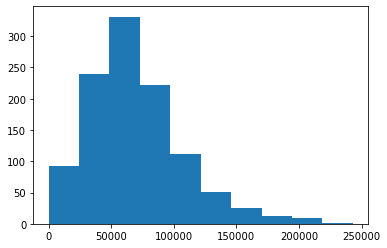

In [88]:
plt.hist(car_data['KM'])

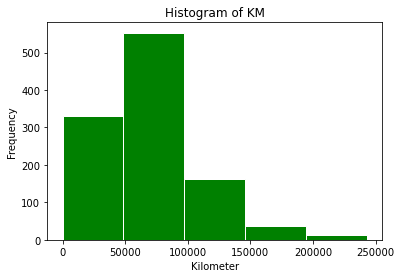

In [89]:
plt.hist(car_data['KM'],color='green',edgecolor='white',bins=5)
plt.title('Histogram of KM')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

### Bins is no of division of the data to get more accurate values. Observe that even Y axis the frequency range changes.

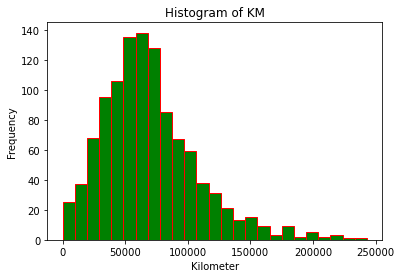

In [90]:
plt.hist(car_data['KM'],color='green',edgecolor='red',bins=25)
plt.title('Histogram of KM')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

## <font color=red>BAR Chart is categorical data and Histogram is Numerical data</font>

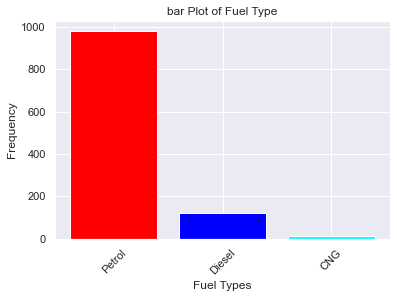

In [100]:
counts= [979,120,12]
fuelType=['Petrol','Diesel','CNG']
index=np.arange(len(fuelType)) #0,1,2
plt.bar(index,counts,color=['red','blue','cyan'])
plt.title('bar Plot of Fuel Type')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.xticks(index,fuelType,rotation=45) # To add labels
plt.show()

# Seaborn

In [101]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Price'>

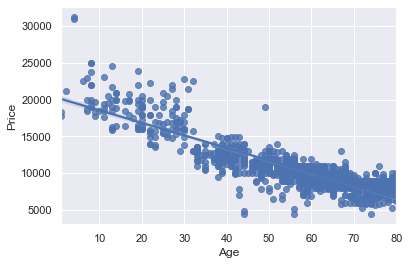

In [102]:
sns.set(style="darkgrid") #theme
sns.regplot(x=car_data['Age'],y=car_data['Price']) #regplot is regression plot

### Removingthe regression line

<AxesSubplot:xlabel='Age', ylabel='Price'>

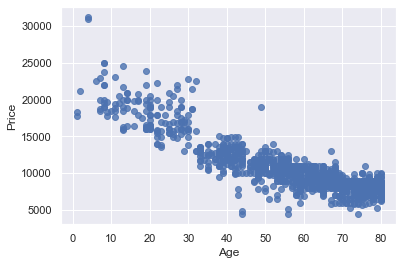

In [103]:
sns.regplot(x=car_data['Age'],y=car_data['Price'],fit_reg=False) 

### To get scatter point as stars

### Regression Plot in Seaborn

<AxesSubplot:xlabel='Age', ylabel='Price'>

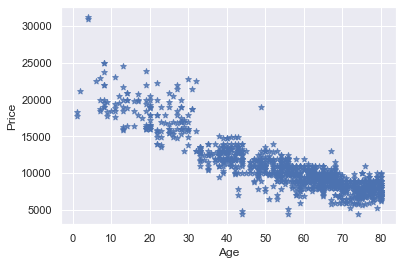

In [104]:
sns.regplot(x=car_data['Age'],y=car_data['Price'],fit_reg=False,marker="*") 

### Adding one more variable FuelType

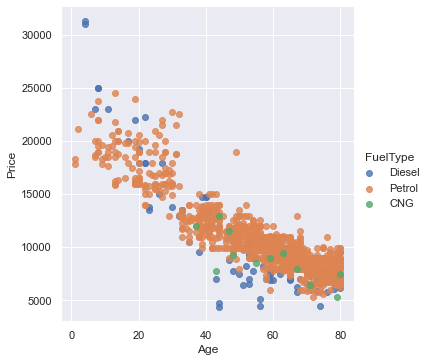

In [112]:
sns.lmplot(x='Age',y='Price',data=car_data,fit_reg=False,hue='FuelType',legend=True) #palette='set1' option did not work

### Distribution Plot

#### Input should be any continuos or numeric variable. Frequency Dist in terms of count. To remove Frequency density estimate use kde=False

<AxesSubplot:xlabel='Age'>

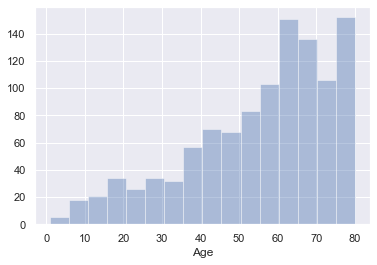

In [118]:
sns.distplot(car_data['Age'],kde=False)

## <font color='red'>Distplot is removed. Use Displot</font>

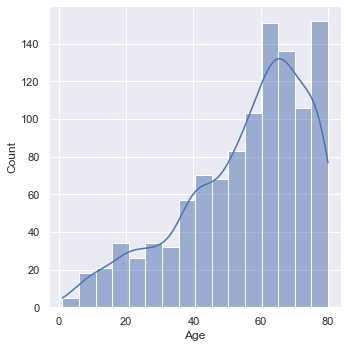

In [123]:
sns.displot(car_data['Age'],kde=True)#kde=True draws the density fir line

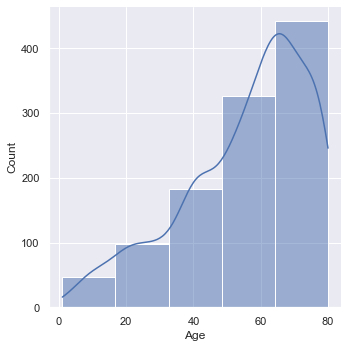

In [124]:
sns.displot(car_data['Age'],kde=True,bins=5)#bins=5 reduces the number of bars to 5

### barplot Countplot is used

<AxesSubplot:xlabel='FuelType', ylabel='count'>

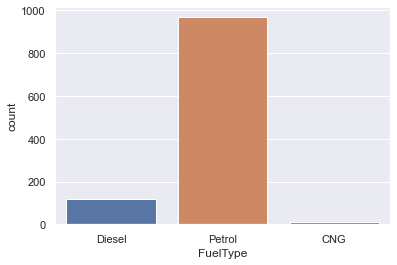

In [125]:
sns.countplot(x='FuelType',data=car_data)

### Grouped Bar Plot

<AxesSubplot:xlabel='FuelType', ylabel='count'>

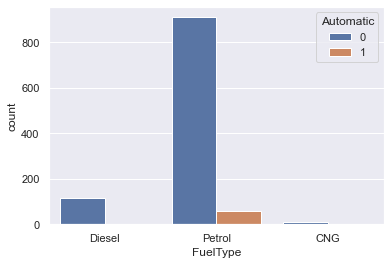

In [126]:
sns.countplot(x='FuelType',data=car_data,hue='Automatic')

## Box and Whisker Plot - Numerical variable

<AxesSubplot:ylabel='Price'>

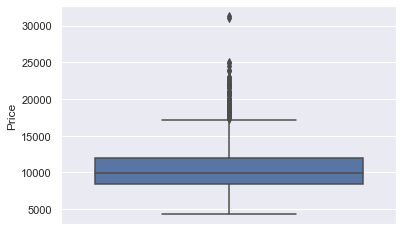

In [128]:
sns.boxplot(y=car_data['Price']) # Points above and below are outliers

### <font color=green>Boxplot can be used when we have one numerical and one categorical variable</plot>

<AxesSubplot:xlabel='FuelType', ylabel='Price'>

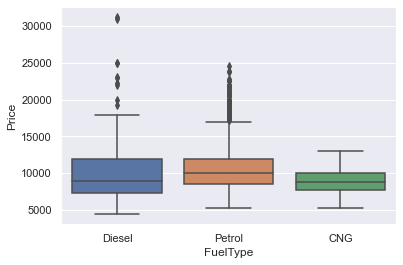

In [130]:
sns.boxplot(x=car_data['FuelType'],y=car_data['Price']) 

### Grouped Box and Whisker PLot

<AxesSubplot:xlabel='FuelType', ylabel='Price'>

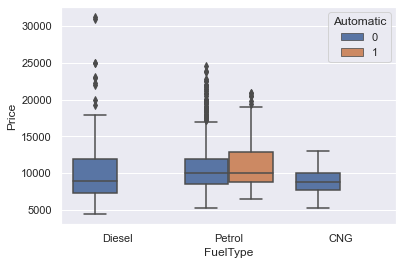

In [132]:
sns.boxplot(x='FuelType',y=car_data['Price'],hue='Automatic',data=car_data) 

# <font color=blue>Creating two plots side by side or one above another</font>

<AxesSubplot:xlabel='Price'>

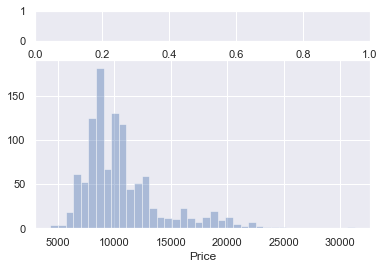

In [142]:
f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={'height_ratios':(0.15,0.85)}) #creating two spaces for plotting
sns.distplot(car_data['Price'],ax=ax_hist,kde=False)

## Pairwise Plot. It is used to plot pairwise relationship in a dataset. Creates scatterplot for joint relationship and histogram for univariant distribution.

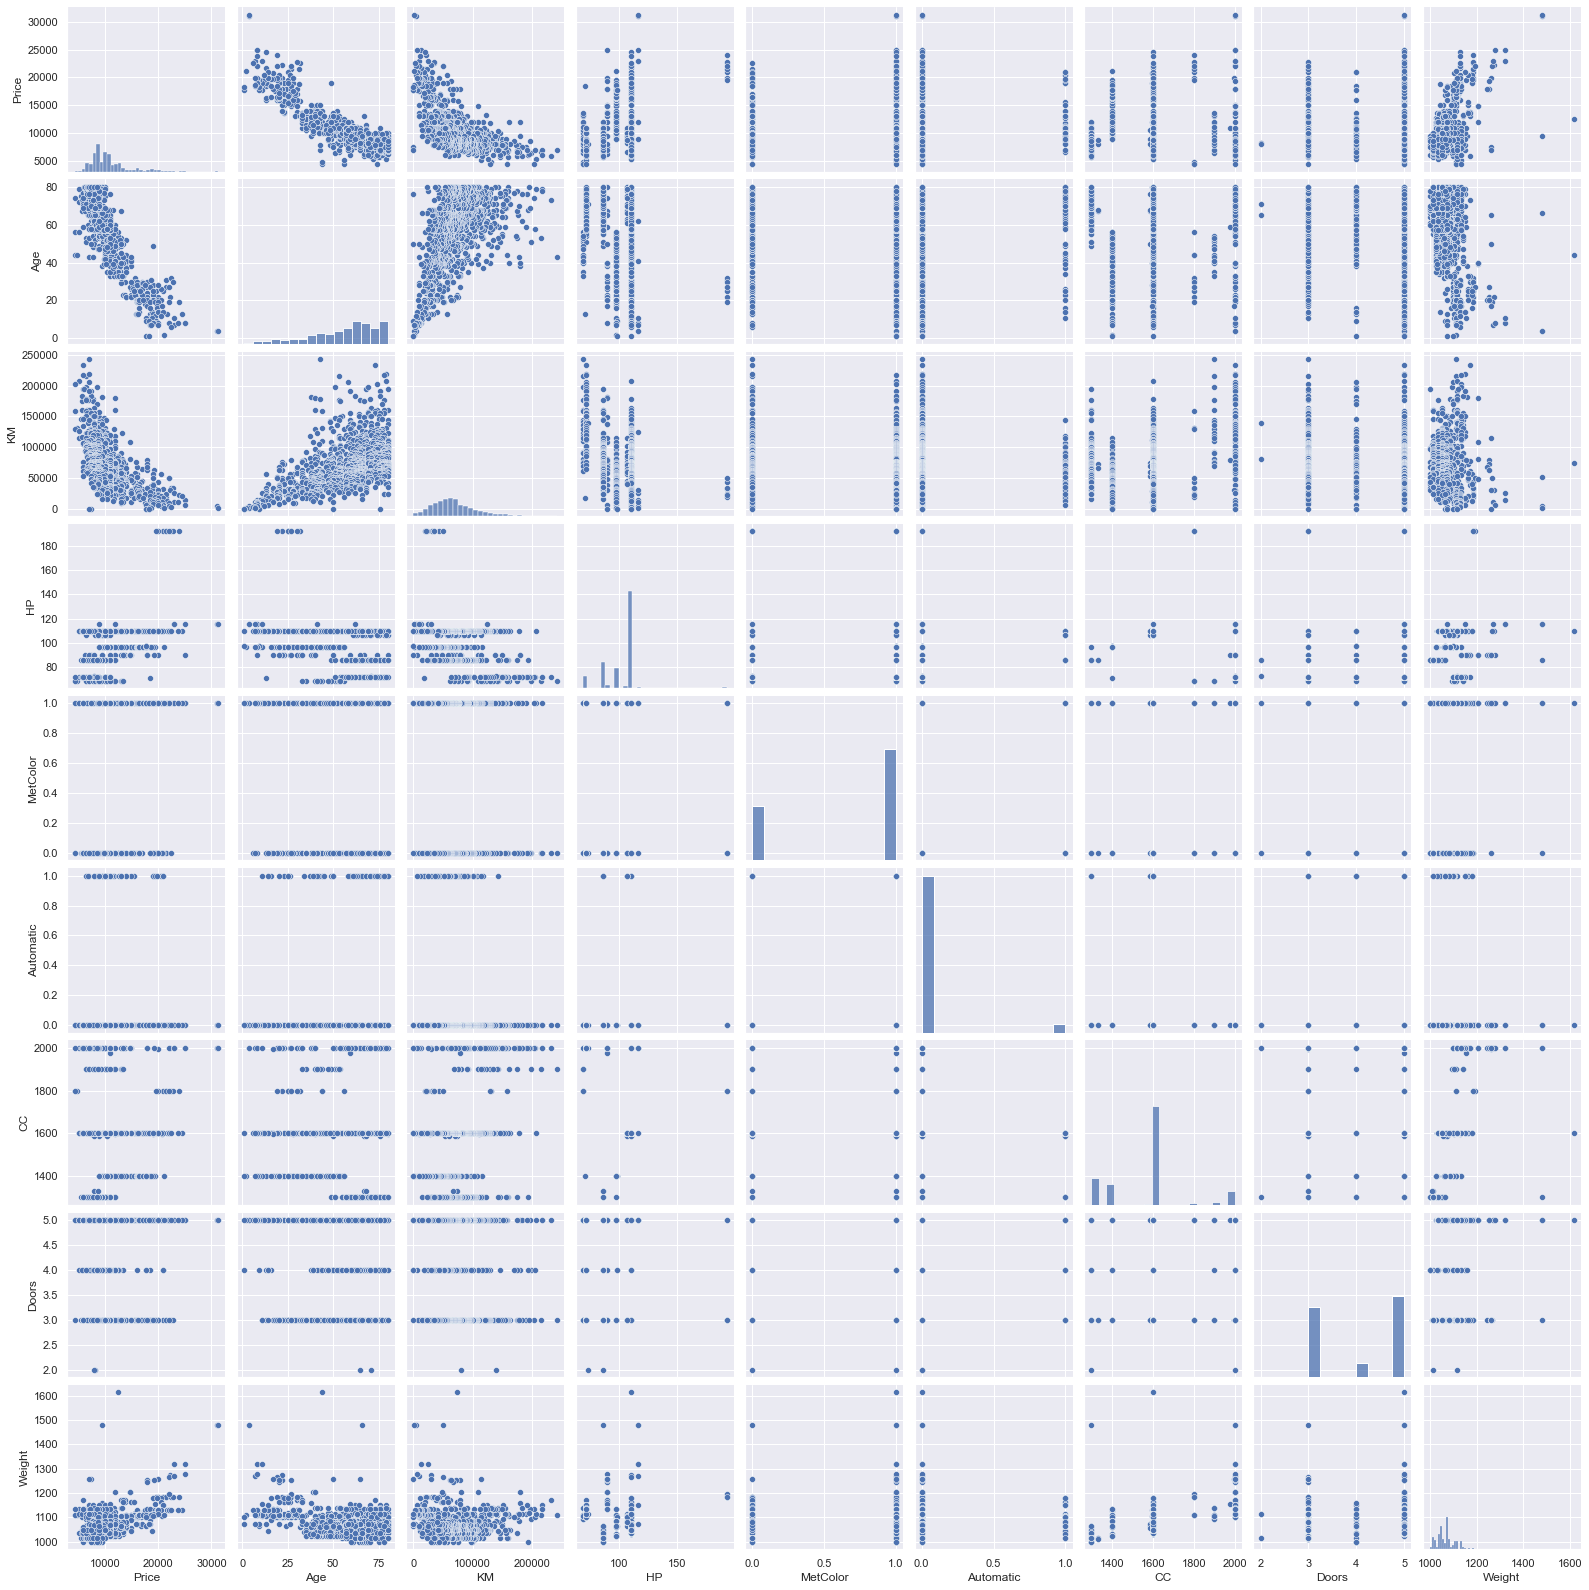

In [144]:
sns.pairplot(car_data) # sns.pairplot(car_data,kind='scatter',hue='FuelType') giving Error
plt.show()

In [148]:
car_data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [153]:
missing=car_data[car_data.isnull().any(axis=1)]

# Inputing missing value

In [156]:
car_data.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,10735.937044,55.661496,69268.826642,101.806569,1568.863139,4.062044,1073.416971
std,3636.716945,18.699777,38070.667467,15.034116,184.386960,0.956488,51.812821
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,43.000000,43590.500000,90.000000,1400.000000,3.000000,1045.000000
50%,9900.000000,60.000000,63393.500000,110.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,88031.750000,110.000000,1600.000000,5.000000,1090.000000
max,31275.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,1615.000000


### Gettingmean of single column

In [157]:
car_data['Age'].mean()

55.66149635036496

## To fill inmissing data in Age column with mean age

In [158]:
car_data['Age'].fillna(car_data['Age'].mean(),inplace=True)

#### For KM use .median(). For categorical variable replace with vaue_counts()

In [159]:
car_data['FuelType'].fillna(car_data['FuelType'].value_counts().index[0],inplace=True)

#### <font color=green> car_data['FuelType'].value_counts().index[0] returns Petrol </font>

In [160]:
car_data['MetColor'].mode()

0    1.0
dtype: object

### <font color=red>Note: As median and Mean are scalar values there is no index value but as Mode cannot be a scalar value it has an index.</font>

### When there are multiple empty columns we can fill using a lambda function.

In [161]:
car_data = car_data.apply(lambda x:x.fillna(x.mean() if x.dtype=='float' else x.fillna(x.value_counts().index[0])))